In [95]:
import pandas as pd  # Data manipulation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import nltk
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [96]:
# from google.colab import drive
# drive.mount('/content/drive')

# file_path = "/content/drive/MyDrive/THWS/movie_dataset.txt"
file_path = "./movie_dataset.txt"

In [97]:
df = pd.read_csv(file_path, sep=':::', header=None)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25140\742151162.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, sep=':::', header=None)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [98]:
col_names = ['sr_num', 'movie', 'genrs', 'des']
df.columns = col_names

In [99]:
df.drop(["sr_num"], axis=1, inplace=True)
df

,movie,genrs,des
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [100]:
df.genrs.value_counts()

genrs
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

Text(0.5, 0, 'Number of ocurrences')

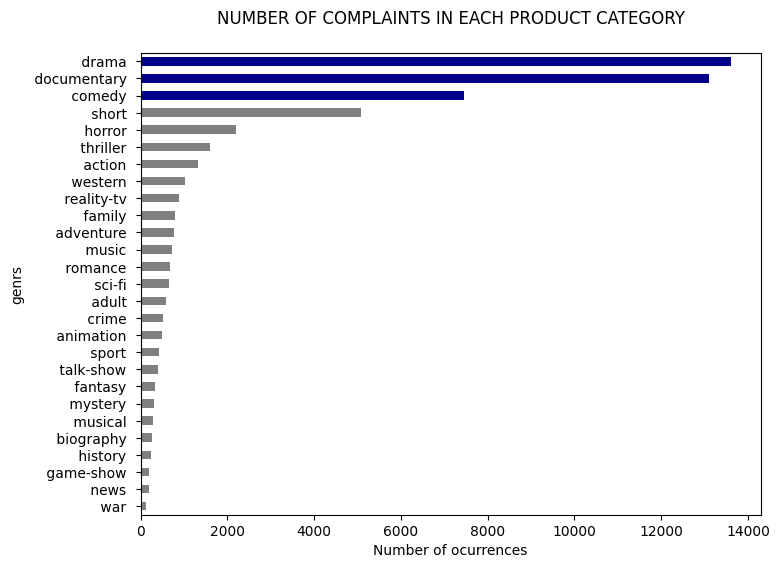

In [101]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
colors = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey',
          'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'darkblue', 'darkblue', 'darkblue']
df.groupby('genrs').des.count().sort_values().plot.barh(
    ylim=0, color=colors, title='NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize=10)

In [102]:
# add one clm as a length of the text
df['num_of_characters'] = df['des'].apply(len)
df.head()

,movie,genrs,des,num_of_characters
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


In [103]:
df[df["num_of_characters"] > 3000].count()

movie                189
genrs                189
des                  189
num_of_characters    189
dtype: int64

In [104]:
df = df[df["num_of_characters"] < 3000]

In [105]:
df["num_of_characters"].describe()

count    54024.000000
mean       588.453224
std        390.928163
min         42.000000
25%        325.000000
50%        463.000000
75%        709.000000
max       2998.000000
Name: num_of_characters, dtype: float64

In [106]:
# finding the average length of the text of each category
df.groupby('genrs')["num_of_characters"].mean()

genrs
 action          570.683168
 adult           482.234295
 adventure       534.525226
 animation       537.022088
 biography       629.844697
 comedy          543.412296
 crime           543.803181
 documentary     647.216566
 drama           611.875850
 family          574.319285
 fantasy         575.572755
 game-show       652.962567
 history         602.057613
 horror          584.778588
 music           548.186301
 musical         573.350181
 mystery         598.990506
 news            488.646409
 reality-tv      533.946833
 romance         621.916168
 sci-fi          555.228748
 short           488.840371
 sport           549.233796
 talk-show       498.838875
 thriller        575.302897
 war             653.590909
 western         673.051607
Name: num_of_characters, dtype: float64

In [107]:
# applying stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['des_stemmed'] = df['des'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25140\1090117434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['des_stemmed'] = df['des'].apply(


In [108]:
# # Applying lemmatization
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# df['des_lemmatized'] = df['des'].apply(
#     lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [109]:
df.head()

,movie,genrs,des,num_of_characters,des_stemmed
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listen in to a convers between hi doctor and p...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,a brother and sister with a past incestu relat...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,as the bu empti the student for their field tr...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,"to help their unemploy father make end meet, e..."
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,the film' titl refer not onli to the un-recov ...


In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['genrs_encoded'] = le.fit_transform(df['genrs'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25140\4294111166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genrs_encoded'] = le.fit_transform(df['genrs'])


In [111]:
df.head()

,movie,genrs,des,num_of_characters,des_stemmed,genrs_encoded
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listen in to a convers between hi doctor and p...,8
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,a brother and sister with a past incestu relat...,24
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,as the bu empti the student for their field tr...,1
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,"to help their unemploy father make end meet, e...",8
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,the film' titl refer not onli to the un-recov ...,8


In [112]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',
                        stop_words='english', max_features=10000)

In [113]:
X = tfidf.fit_transform(df["des_stemmed"]).toarray()
y = df['genrs_encoded']

In [114]:
X.shape

(54024, 10000)

In [115]:
# # Appy PCA to reduce the dimensionality of the data
# from sklearn.decomposition import PCA
# pca = PCA(n_components=7000)
# X_pca = pca.fit_transform(X)
# X_pca.shape

In [116]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [122]:
lsvc = LinearSVC()
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l2')
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [123]:
clfs = {
    "LSVC": lsvc,
    # "SVC": svc,
    'NB': mnb,
    'LR': lrc,
    # 'BgC': bc,
    # 'ETC': etc,
    # 'GBDT': gbdt,
    # 'xgb': xgb
}

In [124]:

def train_classifier(clf, X_train, y_train, X_test, y_test):
    with tf.device('/device:GPU:0'):
        clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')

    return accuracy, precision

In [125]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test)

    print("---------------------------------")
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

---------------------------------
For  LSVC
Accuracy -  0.5765849143914854
Precision -  0.5458389800568163


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------------------------
For  NB
Accuracy -  0.5087459509486348
Precision -  0.4754688785077354
---------------------------------
For  LR
Accuracy -  0.5868579361406756
Precision -  0.5593689700656419


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
